In [35]:
import pandas as pd
import numpy as np
import re
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from dateutil import parser
import warnings
warnings.filterwarnings('ignore')

In [36]:
dataset = pd.read_csv (r'C:\Users\carlo\Documents\College\reu_cyber\test_data\csv2\eth2dump-tcpSYNFloodDDoS30m-1h_1.csv')
dataset = dataset[(dataset['MAC Source']=='00:0c:29:e6:14:0d') | (dataset['MAC Source']=='00:0c:29:9d:9e:9e') | (dataset['MAC Source']=='48:5b:39:64:40:79') | (dataset['MAC Source']=='00:80:f4:09:51:3b')]

In [37]:
regex = "^((25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])\.){3}(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])$"

def check(Ip):
     
    # pass the regular expression
    # and the string in search() method
    if(re.search(regex, Ip)):
        return True
    else:
        return False

In [38]:
def previous_ip_time(i):
    global dataset
    i-=1
    current_ip = dataset.loc[i]['Source']
    j = i-1
    if j == -1:
        return dataset.loc[i]['Time']

    while(current_ip != dataset.loc[j]['Source']):
        j -= 1
        if j == -1:
            return 0.0
    
    idx_delta = i-j
    return dataset.loc[i-idx_delta]['Time']


In [39]:
distinct = dataset['MAC Source'].unique()
distinct

array(['00:0c:29:9d:9e:9e', '48:5b:39:64:40:79', '00:80:f4:09:51:3b',
       '00:0c:29:e6:14:0d'], dtype=object)

In [40]:
# creates dataframe array grouped by ip address
grouped_ip = dataset.groupby(dataset['MAC Source'])
ip_arr_df = [grouped_ip.get_group(d) for d in distinct]
grouped_ip.groups.keys()

dict_keys(['00:0c:29:9d:9e:9e', '00:0c:29:e6:14:0d', '00:80:f4:09:51:3b', '48:5b:39:64:40:79'])

In [41]:
dataset['Epoch Time'] = pd.to_datetime(dataset['Epoch Time'], errors='coerce')
packets_per_sec = dataset.set_index('Epoch Time').groupby(pd.Grouper(freq='1S'))['No.'].count()
#vars(bytes_per_sec.index)
packets_per_sec

Epoch Time
2018-08-01 21:44:42     9
2018-08-01 21:44:43     9
2018-08-01 21:44:44    31
2018-08-01 21:44:45    15
2018-08-01 21:44:46    13
                       ..
2018-08-01 22:44:38     9
2018-08-01 22:44:39    30
2018-08-01 22:44:40    16
2018-08-01 22:44:41     9
2018-08-01 22:44:42     2
Freq: S, Name: No., Length: 3601, dtype: int64

['00:0c:29:9d:9e:9e']
241
['48:5b:39:64:40:79']
241
['00:80:f4:09:51:3b']
241
['00:0c:29:e6:14:0d']
121


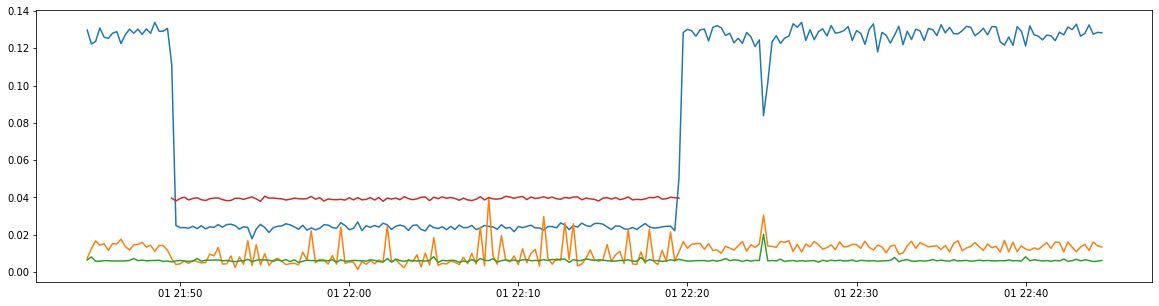

In [42]:
pyplot.rcParams["figure.figsize"] = (20,5)
for df in ip_arr_df:
    #df[df['Protocol']=='TCP']
    # print(len(df))
    print(df['MAC Source'].unique())
    df['Epoch Time'] = pd.to_datetime(df['Epoch Time'], errors='coerce')
    packets_per_sec = df.set_index('Epoch Time').groupby(pd.Grouper(freq='15s'))['Delta Time'].mean()
    print(len(packets_per_sec))
    pyplot.plot(packets_per_sec.index, packets_per_sec) 
    
    # pyplot.plot(df['No.'], df['Delta Time']) 
    # print(df.groupby(['Source Port', 'Destination Port']).size())
    # fig, ax = pyplot.subplots()
    # ax.scatter(df['Time'], df['Delta Time']) #c=dataset['Source'].map(colors)
    # pyplot.show()
    # print(df['Source'].unique())

    # fig, ax = pyplot.subplots()
    # ax.scatter(packets_per_sec.index, packets_per_sec) #c=dataset['Source'].map(colors)
 
    # pyplot.show()
pyplot.show()
    # df['Protocol'].value_counts().plot.bar()
    # df['Protocol'].value_counts().plot.pie()

    # pyplot.show()
    #CLEAN